# Importing  libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Data Loading and Inspection



> Load the Titanic dataset and display basic information to understand the structure and data types, as well as summary statistics to get an overview of the data.



In [14]:
# Load the Titanic dataset
df = pd.read_csv('/content/Titanic.csv')

In [19]:
# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [21]:

df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


# Data Cleaning



> Handle missing values by filling or dropping columns. The median fills in missing ages, the mode fills in missing embarkations, and columns with too many missing values are removed.



In [22]:

print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [24]:

df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-2662708710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [25]:

df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

/tmp/ipython-input-2640497222.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)


In [26]:
# Drop the 'deck' column due to many missing values
df.drop(columns=['Cabin'], inplace=True)

In [27]:
# Verify data cleaning
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Exploratory Data Analysis (EDA)

Distribution of passenger ages

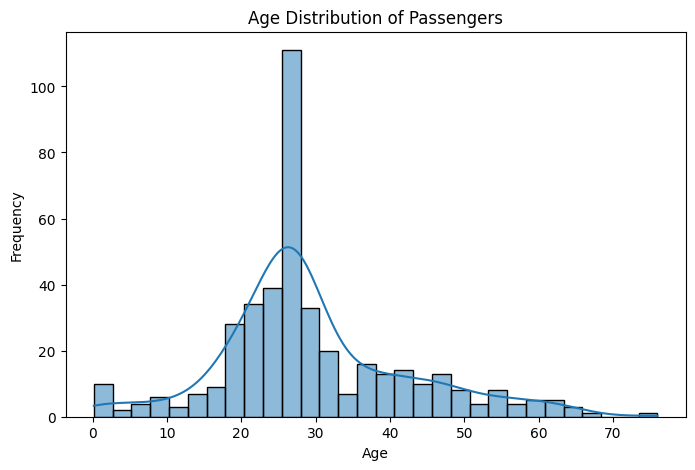

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



> Visualize the age distribution of passengers to understand the age range and identify common age groups using a histogram.



Survival count by gender

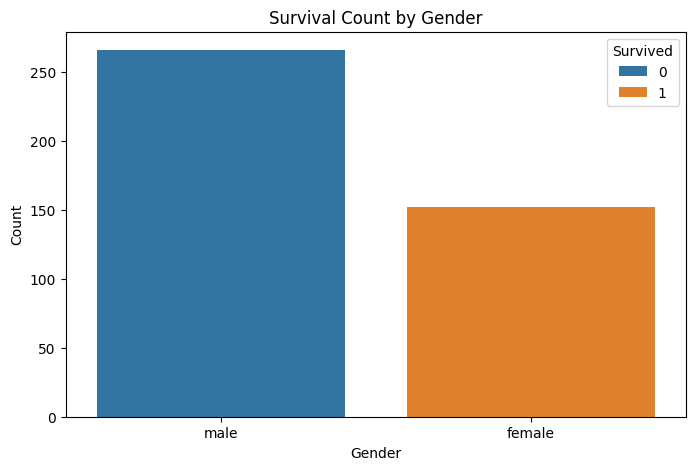

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



> A count plot shows the survival distribution based on gender, indicating which gender had a higher survival rate.



Correlation matrix heatmap

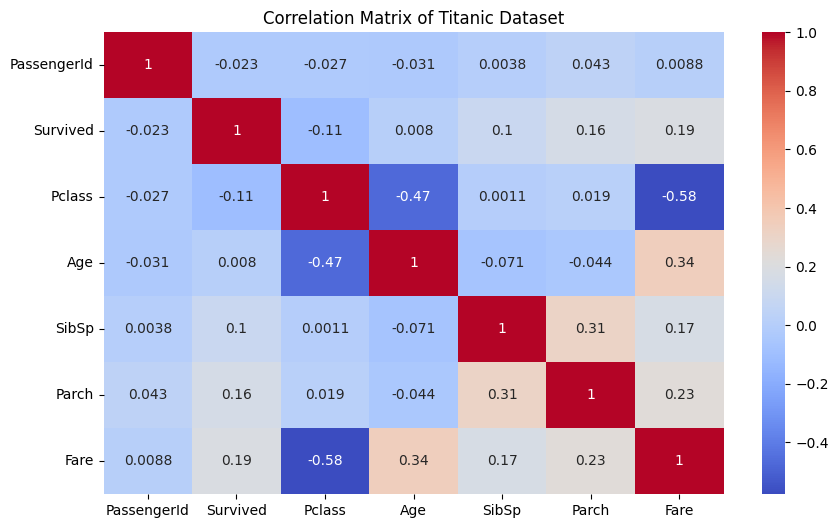

In [32]:

numerical_titanic = df.select_dtypes(include=['float64', 'int64'])


corr = numerical_titanic.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()



> The heatmap visualizes correlations between numerical features, helping to identify relationships that may influence survival.



Survival by class

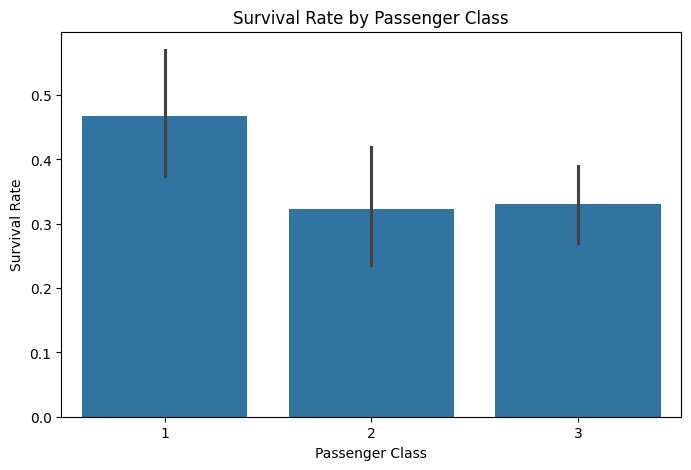

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()



> A bar plot shows how survival rates vary by passenger class, highlighting the impact of socio-economic status.



Survival based on fare

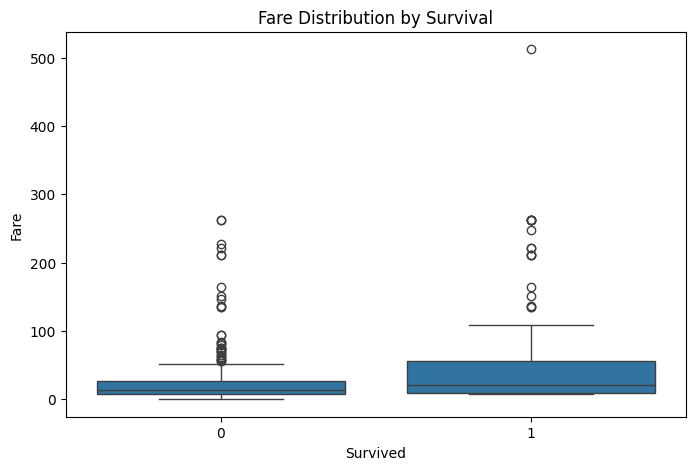

In [34]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()




> A box plot illustrates how fares correlate with survival, indicating whether higher fare passengers had better survival chances.



# Additional Data Visualizations

SibSpDistribution of passengers by SibSp

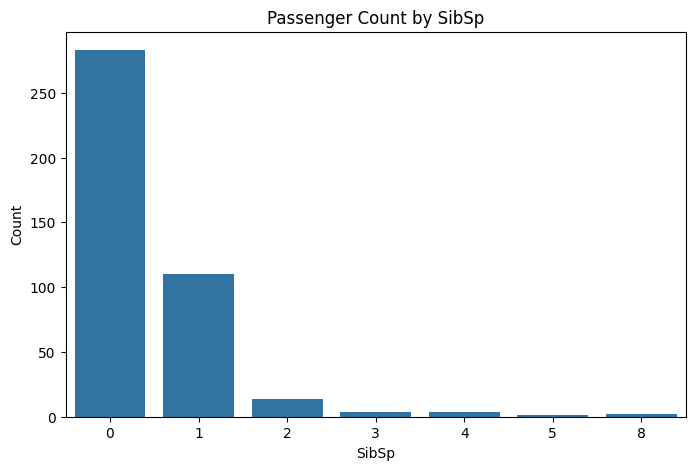

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', data=df)
plt.title('Passenger Count by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()



> A count plot to see where most passengers boarded, helping to understand the demographics of the Titanic passengers.



Survival rate by embark town

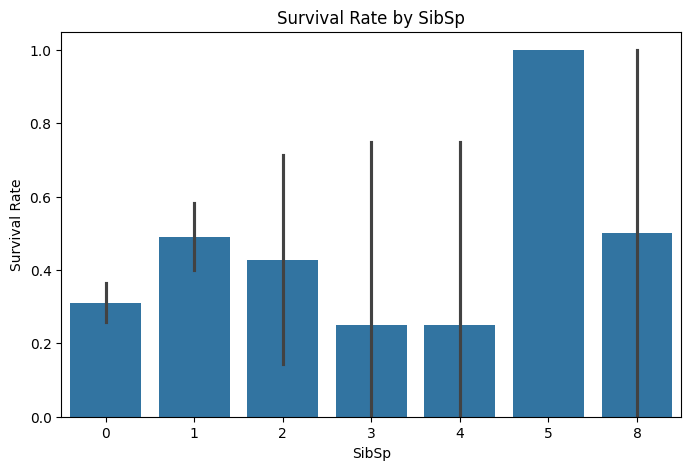

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=df)
plt.title('Survival Rate by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.show()



> A bar plot shows survival rates by embarkation town, suggesting geographical differences in survival chances.



Age distribution by passenger class

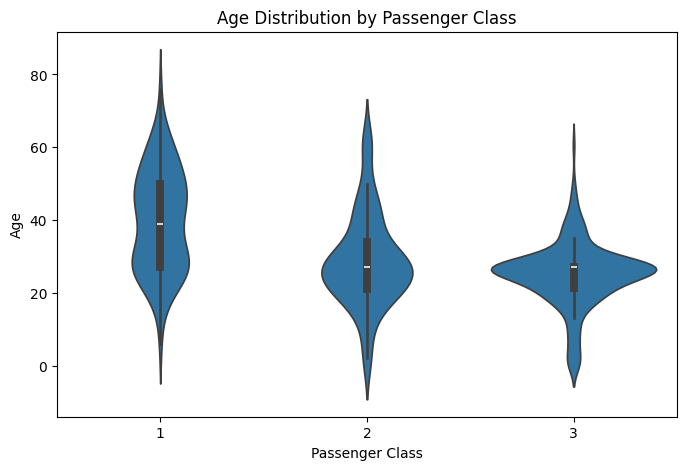

In [51]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()



> A violin plot shows the distribution of ages within each passenger class, indicating differences in age demographics among classes.



Fare distribution by passenger class

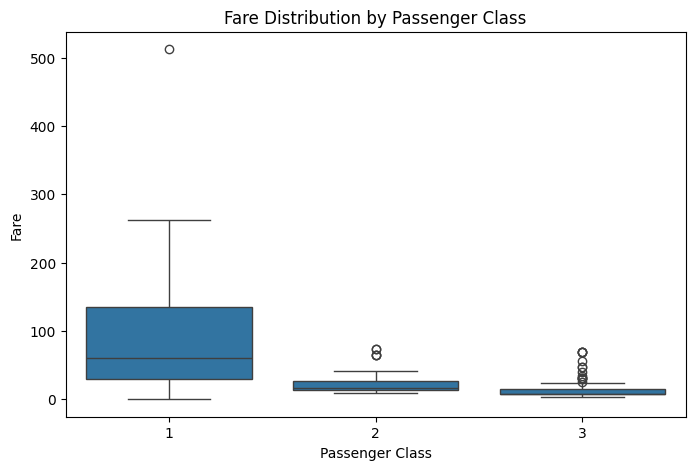

In [52]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()



> This box plot shows how fares varied among passenger classes, indicating economic differences in ticket pricing.



# Summary of Analysis
Age Distribution: Most passengers were young adults, with a significant number of children and elderly individuals.

Gender and Survival: Women had a higher survival rate compared to men, reflecting the "women and children first" policy.

Passenger Class and Survival: First-class passengers had higher survival rates than those in lower classes, showing a class-based disparity in survival chances.

Fare Influence: Higher fare payments correlated with better survival odds, likely due to better access to lifeboats.